# DS120

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('supermarket_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

The data set has 17 variables and 1000 entries with no null value 

In [4]:
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [6]:
data.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [7]:
data.drop(['gross margin percentage', 'Branch', 'Invoice ID', 'Tax 5%'], axis=1, inplace=True)

In [8]:
data['Date'] = pd.to_datetime(data.Date)
import datetime as dt
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data['Time'] = pd.to_datetime(data.Time)
data['Hour'] = data['Time'].dt.hour

In [9]:
data['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

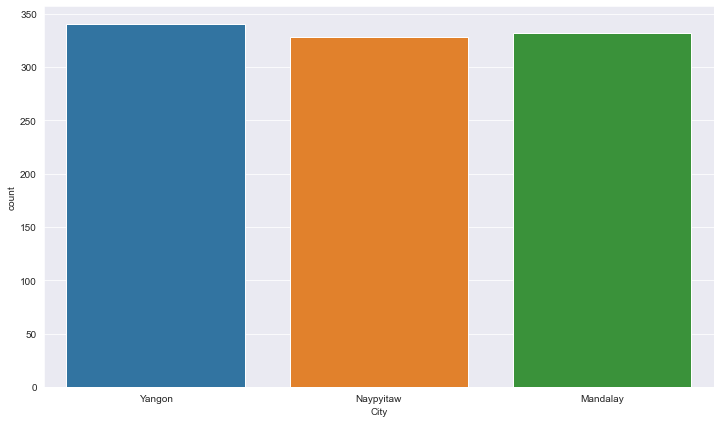

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(data.City)

Yangon has the highest number of customers

In [11]:
data.groupby('City')['Total'].max()

City
Mandalay     1022.49
Naypyitaw    1042.65
Yangon       1039.29
Name: Total, dtype: float64

In [12]:
data.groupby('City')['Total'].mean()

City
Mandalay     319.872506
Naypyitaw    337.099715
Yangon       312.354031
Name: Total, dtype: float64

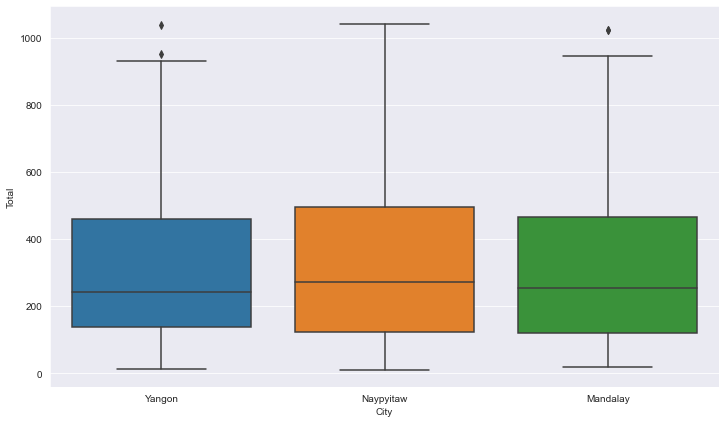

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Total', x = 'City', data = data)

Although the city of Yangon has the highest number of customers, but the city Naypyitaw has the highest average sale

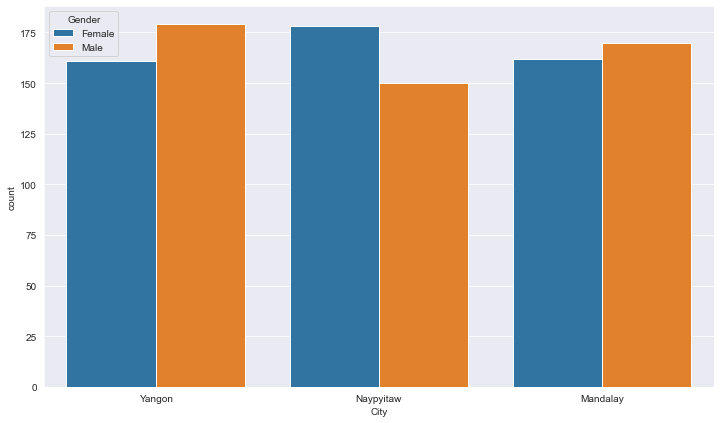

In [14]:
plt.figure(figsize=(12,7))
sns.countplot('City', hue='Gender', data = data)

In Yangon, the male gender placed the highest number of orders

In Naypyitaw, the female gender placed the highest number of orders

In Mandalay, the male gender placed the highest number of orders 

In [15]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

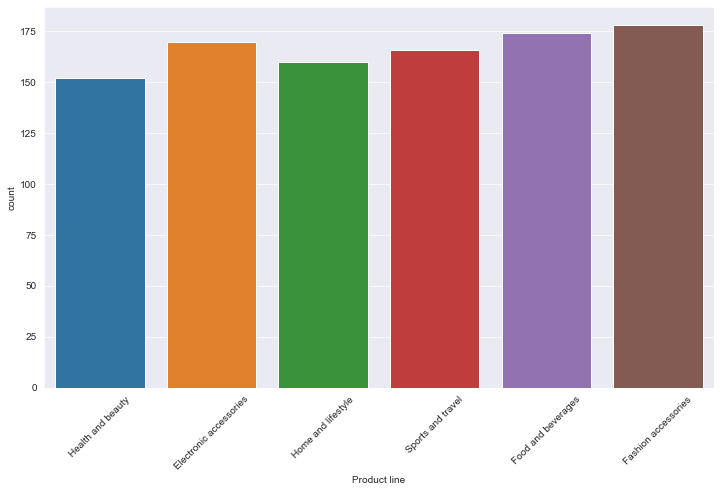

In [16]:
plt.figure(figsize=(12,7))
sns.countplot('Product line', data=data)
plt.xticks(rotation=45)

In [17]:
data.groupby('Product line')['Total'].max()

Product line
Electronic accessories     942.4485
Fashion accessories       1042.6500
Food and beverages        1034.4600
Health and beauty          950.2500
Home and lifestyle        1023.7500
Sports and travel         1002.1200
Name: Total, dtype: float64

In [18]:
data.groupby('Product line')['Total'].mean()

Product line
Electronic accessories    319.632538
Fashion accessories       305.089298
Food and beverages        322.671517
Health and beauty         323.643020
Home and lifestyle        336.636956
Sports and travel         332.065220
Name: Total, dtype: float64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

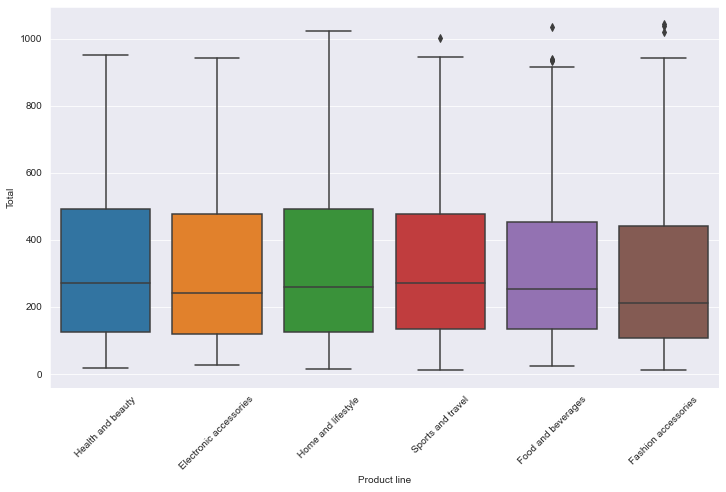

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Total', x = 'Product line', data = data)
plt.xticks(rotation = 45)

The Fashion accessories line has the highest number of orders and sales

In [20]:
data.groupby('Gender')['Total'].max()

Gender
Female    1042.65
Male      1039.29
Name: Total, dtype: float64

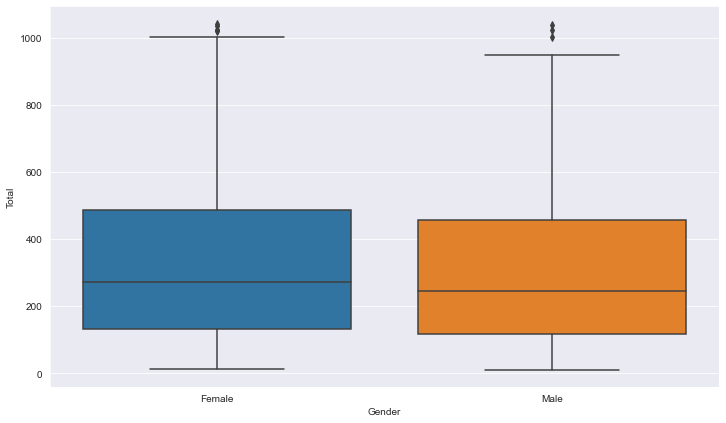

In [21]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Total', x = 'Gender', data = data)

The female gender spend more than the male gender

In [22]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

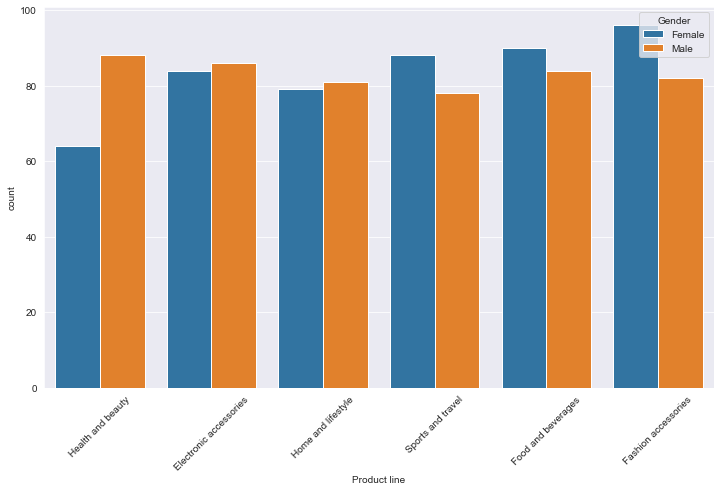

In [23]:
plt.figure(figsize=(12,7))
sns.countplot('Product line', hue = 'Gender', data = data)
plt.xticks(rotation = 45)

The Health and beauty line is mostly purchased by males and is the least purchased line

Electronic accessories line is mostly purchased by males 

Home and lifestyle line is mostly purchased by males

Sports and travel line is mostly purchased by females

Food and beverages line is mostly purchased by females
        
Fashion accessories is mostly purchased by females and is the most purchased line

In [24]:
data.groupby('Product line')['Rating'].mean()

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

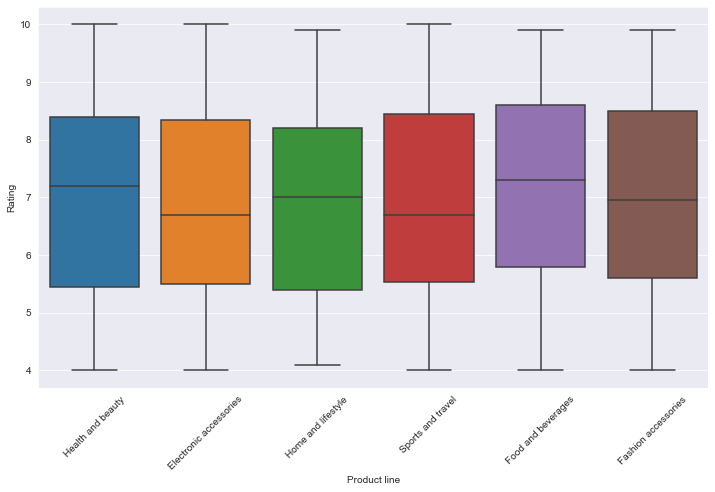

In [25]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Rating', x= 'Product line', data = data)
plt.xticks(rotation = 45)

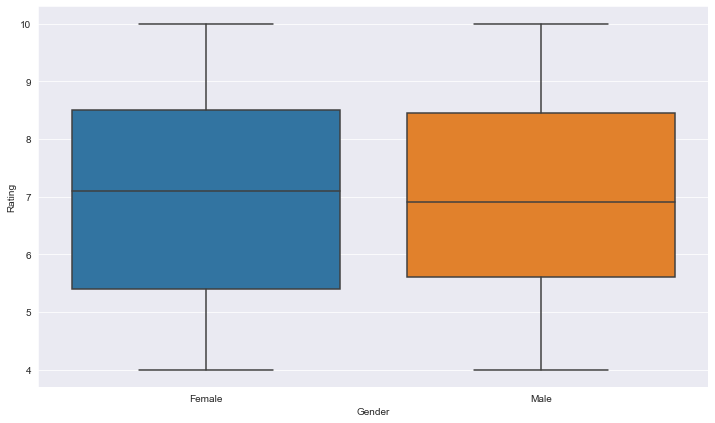

In [26]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Rating', x= 'Gender', data = data)

In [27]:
data.groupby('City')['Rating'].mean()

City
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: Rating, dtype: float64

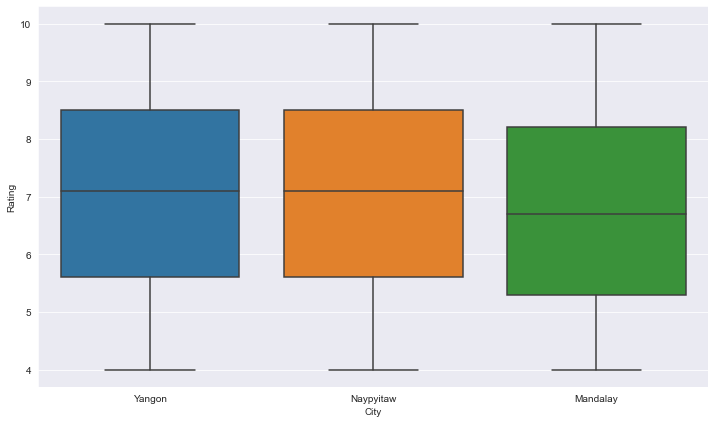

In [28]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Rating', x= 'City', data = data)

Food and beverage line has the highest average rating

sport and travel line has the lowest average rating

The female gender gives the highest average rating

Naypyitaw city has the highest rating

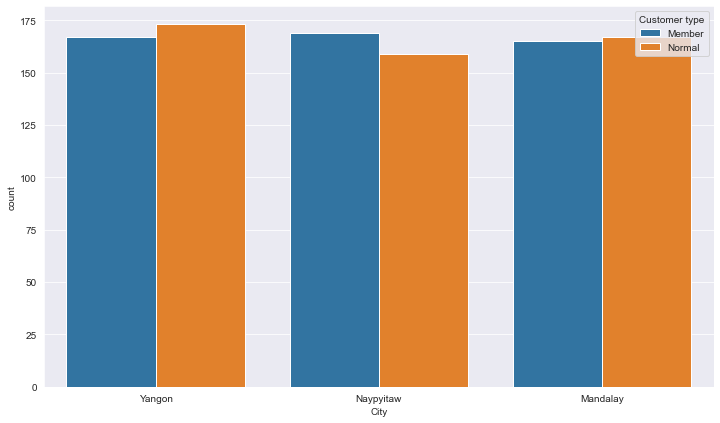

In [29]:
plt.figure(figsize=(12,7))
sns.countplot('City', hue = 'Customer type', data = data)

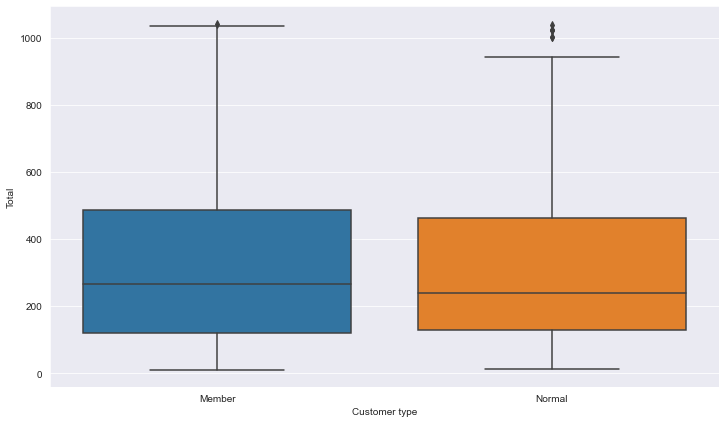

In [30]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Total', x= 'Customer type', data = data)

In Mandalay, the 'normal' customer type has the highest number of orders

In Naypyitaw, the 'member' customer type has the highest number of orders

In Yangon, the 'normal' customer type has the highest number of orders

Overall the 'member' customer type has the highest sales 

In [31]:
data.groupby('Month')['Total'].mean()

Month
1    330.374625
2    320.856020
3    317.262339
Name: Total, dtype: float64

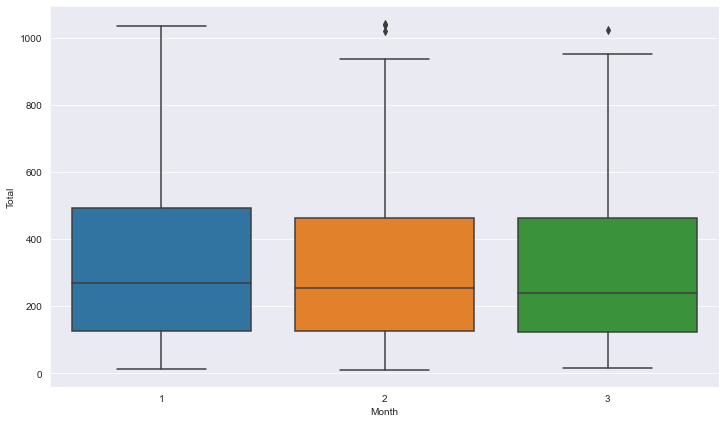

In [32]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Total', x= 'Month', data = data)

In [33]:
data.groupby('Month')['gross income'].mean()

Month
1    15.732125
2    15.278858
3    15.107730
Name: gross income, dtype: float64

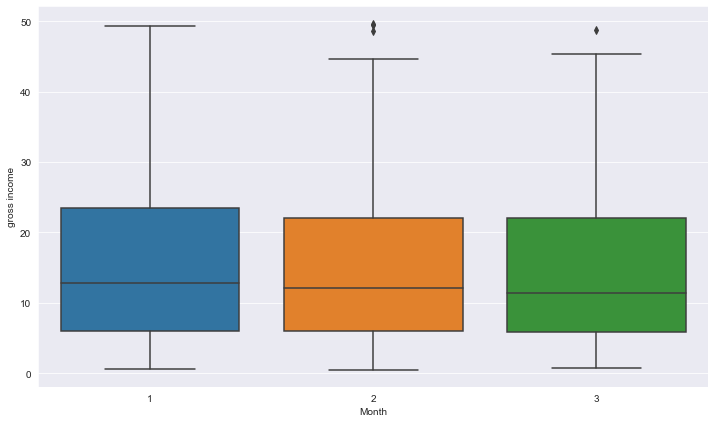

In [34]:
plt.figure(figsize=(12,7))
sns.boxplot(y='gross income', x= 'Month', data = data)

The month of January has the highest sale and gross income

In [35]:
data['Quantity'].min()

1

In [36]:
data['Quantity'].max()

10

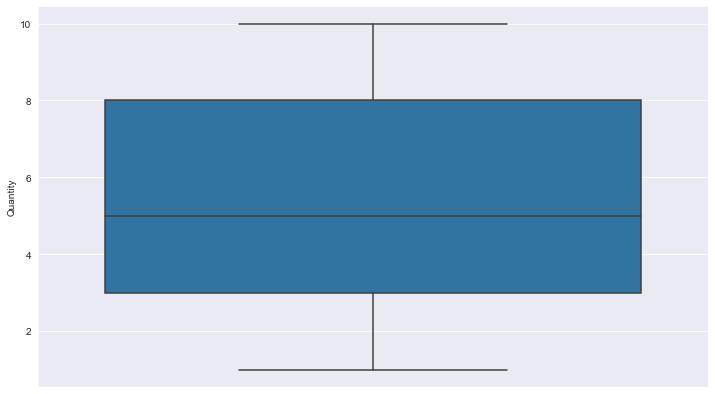

In [37]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Quantity', data=data)

The lowest and highest quantities purchased are one and ten respectively

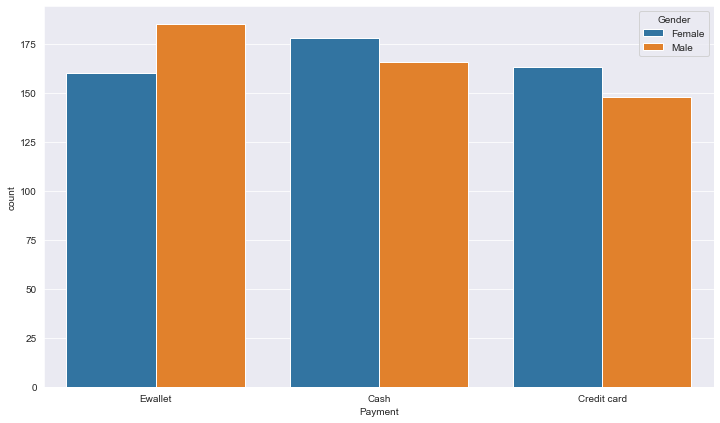

In [38]:
plt.figure(figsize=(12,7))
sns.countplot('Payment', hue = 'Gender', data = data)

In [39]:
data['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

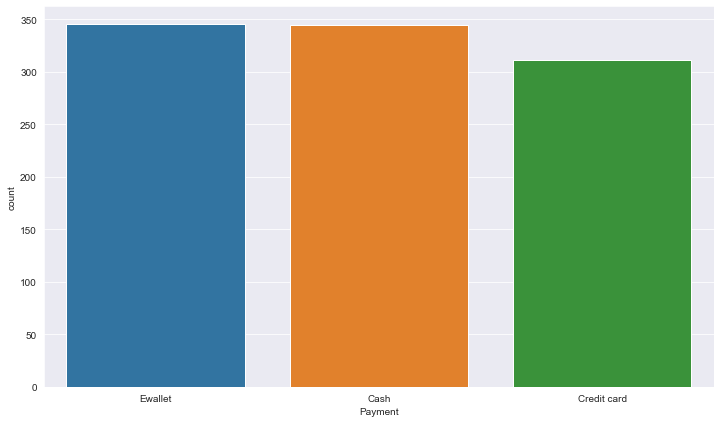

In [40]:
plt.figure(figsize=(12,7))
sns.countplot('Payment', data = data)

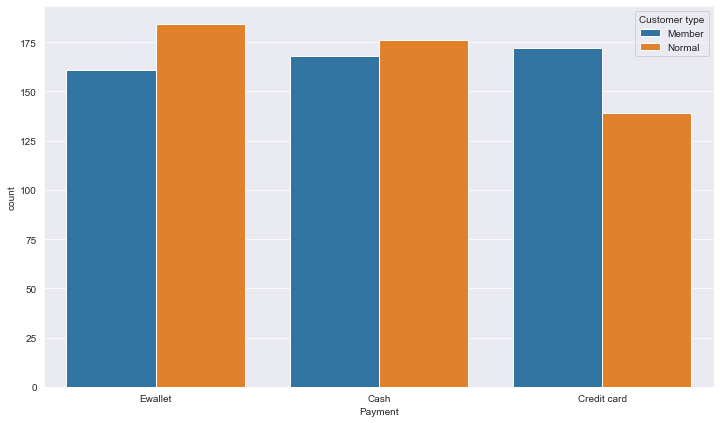

In [41]:
plt.figure(figsize=(12,7))
sns.countplot('Payment', hue = 'Customer type', data = data)

Ewallet is used mostly by males

Cash is used mostly by females

Credit card is used mostly by females

Ewallet and cash are the most used

Ewallet and cash are used mostly by normal customers

Memders mostly use credit card

In [42]:
data.groupby('Hour')['Total'].mean()

Hour
10    311.103772
11    337.525883
12    292.875084
13    337.118709
14    371.426494
15    305.681456
16    327.614591
17    330.340784
18    279.896129
19    351.323124
20    306.260360
Name: Total, dtype: float64

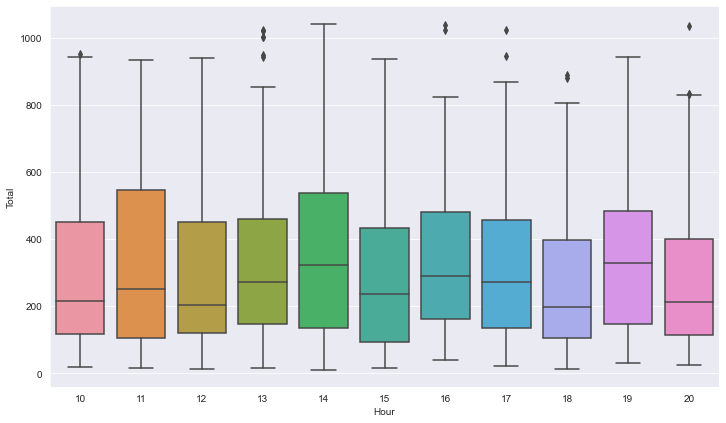

In [43]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Total', x= 'Hour', data = data)

14:00 has the highest average sales